## 1. Import Library

Pada tahap awal, kita perlu mengimpor library Python yang akan digunakan untuk analisis data:

- **Pandas**: untuk membaca dan memanipulasi dataset.
- **NumPy**: untuk perhitungan numerik.
- **Matplotlib** & **Seaborn**: untuk visualisasi data.


In [9]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


In [10]:


df = pd.read_csv("female_players_16.csv")

In [11]:
df.shape


(248, 110)

In [12]:
print(df.head())

   sofifa_id                                         player_url  short_name  \
0     226324  https://sofifa.com/player/226324/carli-lloyd/1...    C. Lloyd   
1     226328  https://sofifa.com/player/226328/megan-rapinoe...  M. Rapinoe   
2     226334  https://sofifa.com/player/226334/abby-wambach/...  A. Wambach   
3     226362  https://sofifa.com/player/226362/louisa-necib/...    L. Nécib   
4     226373  https://sofifa.com/player/226373/nadine-kessle...   N. Keßler   

            long_name player_positions  overall  potential  value_eur  \
0  Carli Anne Hollins  CM, CAM, LM, ST       91         91        NaN   
1  Megan Anna Rapinoe           LM, CM       90         90        NaN   
2        Abby Wambach               ST       90         90        NaN   
3        Louisa Nécib          LM, CAM       90         90        NaN   
4       Nadine Keßler               CM       89         89        NaN   

   wage_eur  age  ...   lcb    cb   rcb    rb    gk  \
0       NaN   32  ...  82+3  82

## Filter Kolom Penting & Tambah Fitur BMI

Untuk analisis ini digunakan tiga atribut utama:
- `height_cm` (tinggi badan dalam cm)
- `weight_kg` (berat badan dalam kg)
- `overall` (rating keseluruhan dari FIFA)

Selain itu, ditambahkan fitur baru **BMI (Body Mass Index)** dengan rumus:
\[
BMI = \frac{berat (kg)}{(tinggi (m))^2}
\]

Kolom `height_m` hanya digunakan sebagai variabel sementara untuk perhitungan, lalu dihapus agar tabel lebih ringkas.


In [15]:
# Filter only important columns
df_filtered = df[['height_cm', 'weight_kg', 'overall']].copy()

# Add BMI feature
df_filtered['BMI'] = df_filtered['weight_kg'] / ((df_filtered['height_cm'] / 100) ** 2)

# Show first 5 rows
df_filtered.head()


,height_cm,weight_kg,overall,BMI
0,173,64,91,21.383942
1,170,60,90,20.761246
2,180,81,90,25.000000
3,168,56,90,19.841270
4,169,61,89,21.357796


In [16]:
# Check missing values
print("Missing values per column:")
print(df_filtered.isnull().sum())

# Check data types
print("\nData types:")
print(df_filtered.dtypes)

# Basic info
df_filtered.info()


Missing values per column:
height_cm    0
weight_kg    0
overall      0
BMI          0
dtype: int64

Data types:
height_cm      int64
weight_kg      int64
overall        int64
BMI          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   height_cm  248 non-null    int64  
 1   weight_kg  248 non-null    int64  
 2   overall    248 non-null    int64  
 3   BMI        248 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 7.9 KB


In [17]:
# Descriptive statistics
desc_stats = df_filtered.describe().T  # transpose biar lebih rapi
desc_stats[['mean', '50%', 'std', 'min', 'max']]


,mean,50%,std,min,max
height_cm,168.967742,170.00000,6.351302,152.000000,187.000000
weight_kg,61.120968,61.00000,5.766850,50.000000,81.000000
overall,75.818548,75.00000,5.469398,61.000000,91.000000
BMI,21.394673,21.32108,1.456737,17.099278,26.142688


## Visualisasi Distribusi (Histogram & Boxplot)

Visualisasi distribusi digunakan untuk memahami pola data:
- **Histogram** menunjukkan frekuensi sebaran nilai.
- **Boxplot** membantu mendeteksi outlier dan sebaran kuartil.

Kita akan plot distribusi untuk:
- Tinggi badan (`height_cm`)
- Berat badan (`weight_kg`)
- Overall rating (`overall`)
- BMI


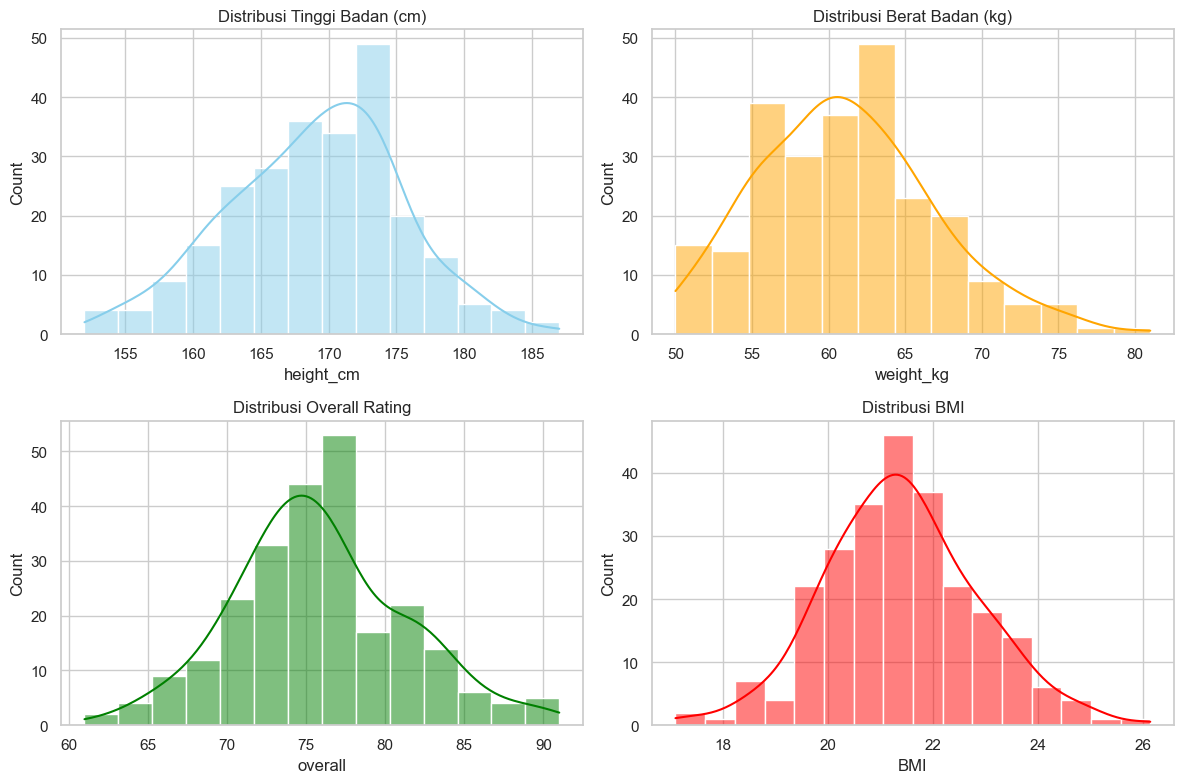

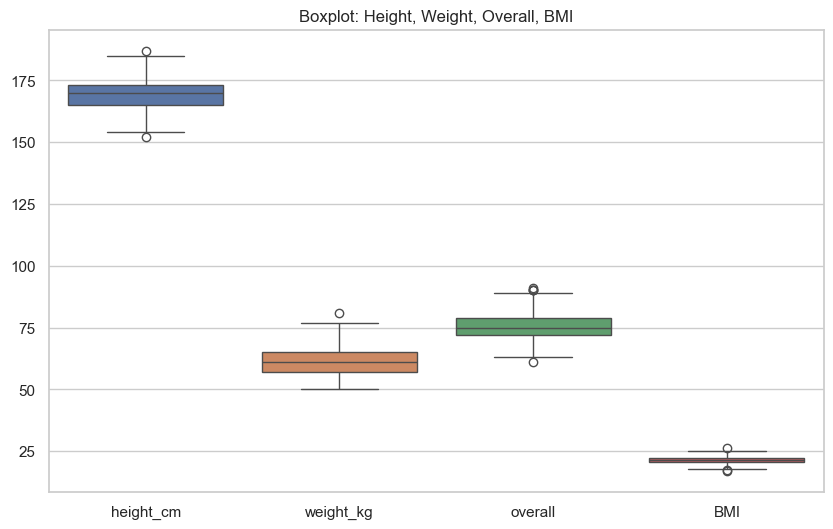

In [18]:
# Histogram distribusi
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df_filtered['height_cm'], kde=True, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Distribusi Tinggi Badan (cm)")

sns.histplot(df_filtered['weight_kg'], kde=True, ax=axes[0,1], color="orange")
axes[0,1].set_title("Distribusi Berat Badan (kg)")

sns.histplot(df_filtered['overall'], kde=True, ax=axes[1,0], color="green")
axes[1,0].set_title("Distribusi Overall Rating")

sns.histplot(df_filtered['BMI'], kde=True, ax=axes[1,1], color="red")
axes[1,1].set_title("Distribusi BMI")

plt.tight_layout()
plt.show()

# Boxplot untuk outlier
plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered[['height_cm','weight_kg','overall','BMI']])
plt.title("Boxplot: Height, Weight, Overall, BMI")
plt.show()
